# Imports

In [549]:
from tqdm import tqdm
import KSAT_properties
import importlib
import numpy as np
import SimAnn
import KSAT
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd

importlib.reload(SimAnn)
importlib.reload(KSAT)
importlib.reload(KSAT_properties)

<module 'KSAT_properties' from '/Users/vittoriomanfriani/Desktop/KSAT/KSAT_properties.py'>

# Acceptance Rate

## M = 200

In [621]:
ksat = KSAT.KSAT(200, 200, 3, seed=45)

best, acc_rate = SimAnn.simann(ksat,
                     mcmc_steps = 200, anneal_steps =20,
                     beta0 = 1, beta1 = 10,
                     seed = 45,
                     debug_delta_cost = False,
                    optimize=False,
                    acceptance_rate=True)

Text(0, 0.5, 'Acc. Rate')

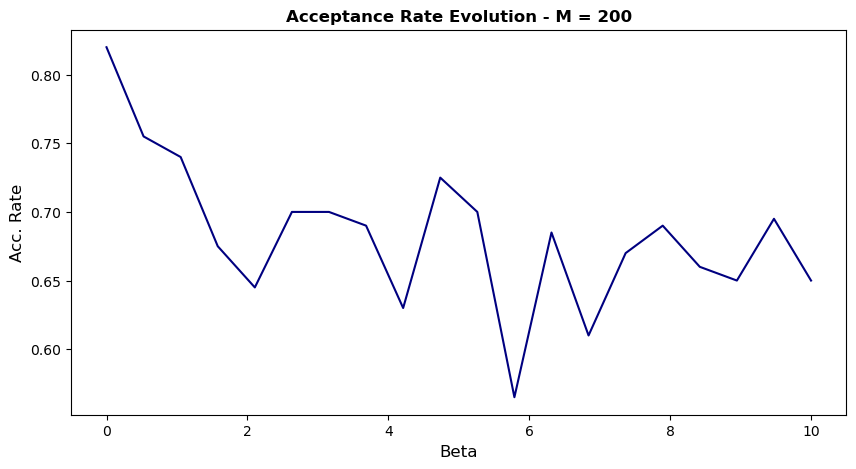

In [622]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(np.linspace(0, 10, 20), acc_rate, color = 'navy')
ax.set_title('Acceptance Rate Evolution - M = 200', fontsize=12, fontweight="bold")
ax.set_xlabel('Beta', fontsize=12)
ax.set_ylabel('Acc. Rate', fontsize=12)

## M = 800

In [623]:
ksat = KSAT.KSAT(200, 800, 3, seed=45)

best, acc_rate = SimAnn.simann(ksat,
                     mcmc_steps = 4000, anneal_steps =150,
                     beta0 = 1, beta1 = 10,
                     seed = 41,
                     debug_delta_cost = False,
                    optimize=False,
                    acceptance_rate=True)

Text(0, 0.5, 'Acc. Rate')

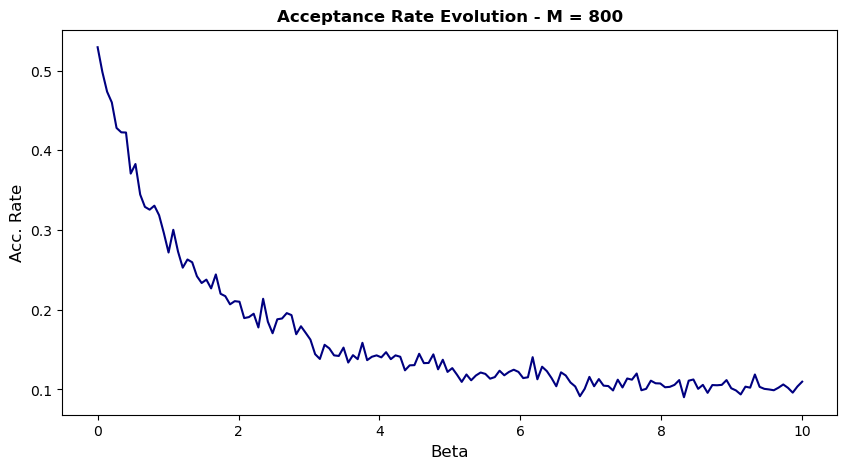

In [625]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(np.linspace(0, 10, 150), acc_rate, color = 'navy')
ax.set_title('Acceptance Rate Evolution - M = 800', fontsize=12, fontweight="bold")
ax.set_xlabel('Beta', fontsize=12)
ax.set_ylabel('Acc. Rate', fontsize=12)

# Percentage Solved for different values of M and N = 200

In [629]:
M = [400, 500, 600, 700, 800, 900, 1000]
percentage_solved = {}
for m in tqdm(M):
    percentage_solved[m] = KSAT_properties.empirical_probability(m)

100%|██████████| 7/7 [01:40<00:00, 14.37s/it]


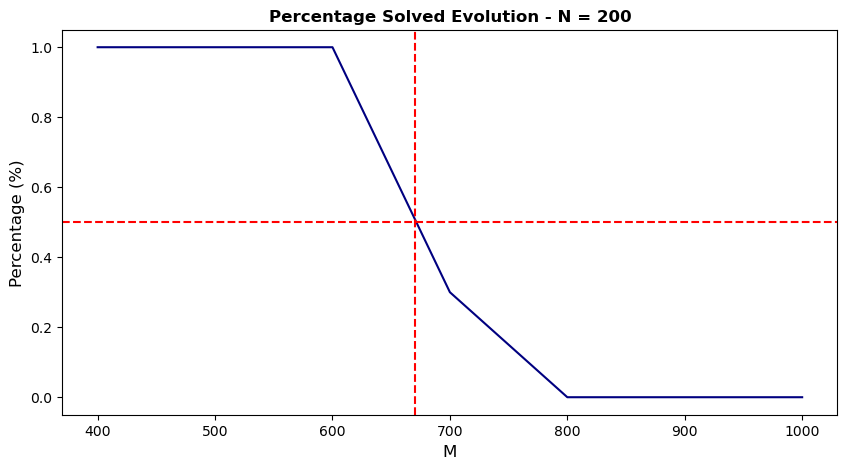

In [632]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(percentage_solved.keys(), percentage_solved.values(), color = 'navy')
ax.set_title('Percentage Solved Evolution - N = 200', fontsize=12, fontweight="bold")
ax.set_xlabel('M', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.axhline(y = 0.5, linestyle = '--', color = 'red')
ax.axvline(x = 670, linestyle = '--', color = 'red')

# Algorithmic Threshold Analysis

## Finding M_alg Values through Binary Search

In [434]:
N = [200,300,400,500,600]
M_alg = {}

In [435]:
for n in tqdm(N):
    mid_M = KSAT_properties.find_threshold(n, target_prob=0.5, min_M=100, max_M=2000)
    M_alg[n] = mid_M

100%|██████████| 5/5 [16:29<00:00, 197.84s/it]


In [443]:
M_alg

{200: 611, 300: 797, 400: 961, 500: 1040, 600: 1092}

Text(0, 0.5, 'M')

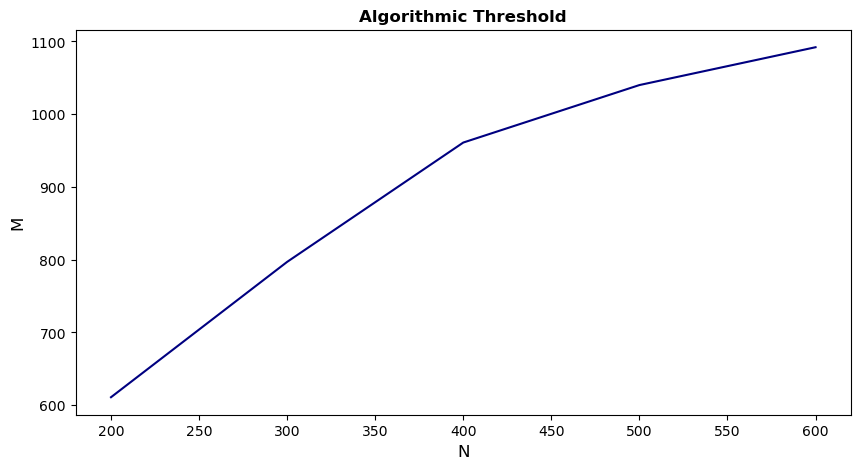

In [437]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(M_alg.keys(), M_alg.values(), color = 'navy')
ax.set_title('Algorithmic Threshold', fontsize=12, fontweight="bold")
ax.set_xlabel('N', fontsize=12)
ax.set_ylabel('M', fontsize=12)

## System of Variables around M_alg

### Note: we compute the empirical probability only in the interval in which it goes from 1 to 0

In [608]:
M_200 = [400, 500, 600, 700, 800, 900, 1000, 1100]
percentage_solved_200 = {}
for m in tqdm(M_200):
    percentage_solved_200[m] = KSAT_properties.empirical_probability(m, N = 200)

100%|██████████| 8/8 [02:00<00:00, 15.07s/it]


In [557]:
M_300 = [600, 700, 800, 900, 1000, 1100, 1200, 1300]
percentage_solved_300 = {}
for m in tqdm(M_300):
    percentage_solved_300[m] = KSAT_properties.empirical_probability(m, N = 300)

100%|██████████| 7/7 [02:54<00:00, 24.96s/it]


In [567]:
M_400 = [800, 900, 1000, 1100, 1200, 1300, 1400, 1500]
percentage_solved_400 = {}
for m in tqdm(M_400):
    percentage_solved_400[m] = KSAT_properties.empirical_probability(m, N = 400)

100%|██████████| 8/8 [04:24<00:00, 33.10s/it]


In [575]:
M_500 = [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800]
percentage_solved_500 = {}
for m in tqdm(M_500):
    percentage_solved_500[m] = KSAT_properties.empirical_probability(m, N = 500)

100%|██████████| 9/9 [07:11<00:00, 47.99s/it]


In [582]:
M_600 = [1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100]
percentage_solved_600 = {}
for m in tqdm(M_600):
    percentage_solved_600[m] = KSAT_properties.empirical_probability(m, N = 600)

100%|██████████| 10/10 [10:36<00:00, 63.60s/it]


In [611]:
# Initialize dataset to store values of P(M, N)
probabilities = pd.DataFrame(index = np.linspace(400, 2200, 19))
probabilities['200'] = percentage_solved_200
probabilities['300'] = percentage_solved_300
probabilities['400'] = percentage_solved_400
probabilities['500'] = percentage_solved_500
probabilities['600'] = percentage_solved_600
# Fill upper NaNs with 1
probabilities.iloc[:8] = probabilities.iloc[:8].fillna(1)
#Fill lower NaNs with 0
probabilities.iloc[8:] = probabilities.iloc[8:].fillna(0)

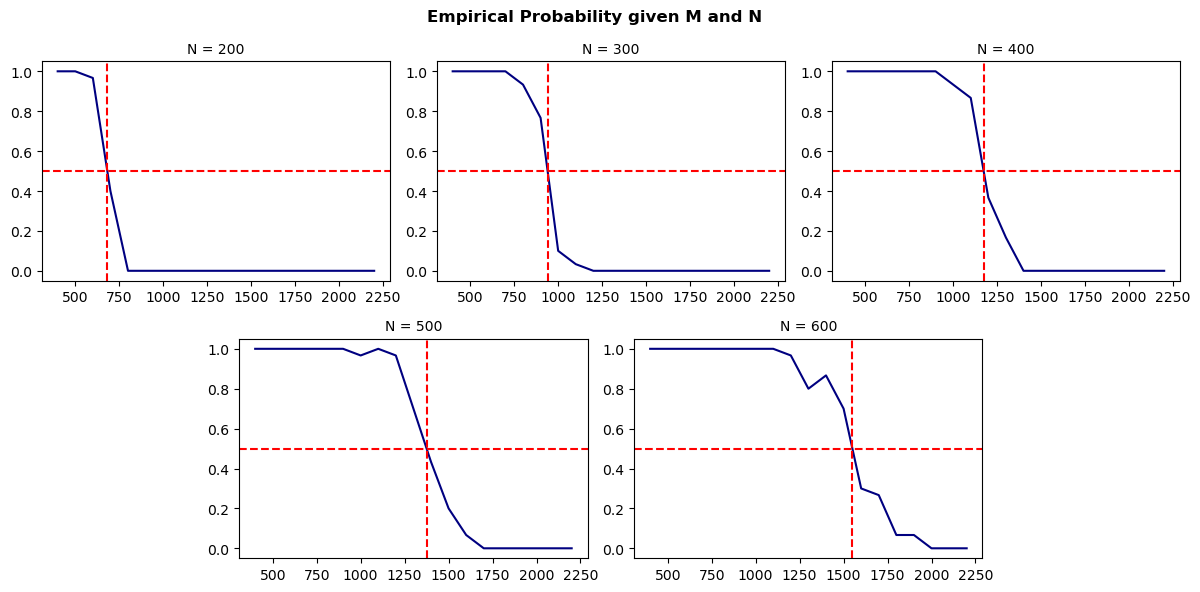

In [618]:
# Create a GridSpec layout for 2 rows and uneven column widths
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 6, figure=fig)  # 2 rows, 3 columns

# Create 5 subplots across the GridSpec layout
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[0, 4:6])
ax4 = fig.add_subplot(gs[1, 1:3])
ax5 = fig.add_subplot(gs[1, 3:5])

ax1.plot(probabilities['200'], color = 'navy')
ax1.axhline(y = 0.5, linestyle = '--', color = 'red')
ax1.axvline(x = 680, linestyle = '--', color = 'red')
ax1.set_title('N = 200', fontsize=10)

ax2.plot(probabilities['300'], color = 'navy')
ax2.axhline(y = 0.5, linestyle = '--', color = 'red')
ax2.axvline(x = 940, linestyle = '--', color = 'red')
ax2.set_title('N = 300', fontsize=10)

ax3.plot(probabilities['400'], color = 'navy')
ax3.axhline(y = 0.5, linestyle = '--', color = 'red')
ax3.axvline(x = 1175, linestyle = '--', color = 'red')
ax3.set_title('N = 400', fontsize=10)

ax4.plot(probabilities['500'], color = 'navy')
ax4.axhline(y = 0.5, linestyle = '--', color = 'red')
ax4.axvline(x = 1375, linestyle = '--', color = 'red')
ax4.set_title('N = 500', fontsize=10)

ax5.plot(probabilities['600'], color = 'navy')
ax5.axhline(y = 0.5, linestyle = '--', color = 'red')
ax5.axvline(x = 1545, linestyle = '--', color = 'red')
ax5.set_title('N = 600', fontsize=10)

fig.suptitle("Empirical Probability given M and N", fontsize=12, fontweight="bold")
plt.tight_layout()

# Collapsing Curve

In [619]:
# Initialize M_alg from the values found in the graph
M_alg = {200:670, 300:940, 400:1175, 500:1375, 600:1540}

Text(0, 0.5, 'Percentage (%)')

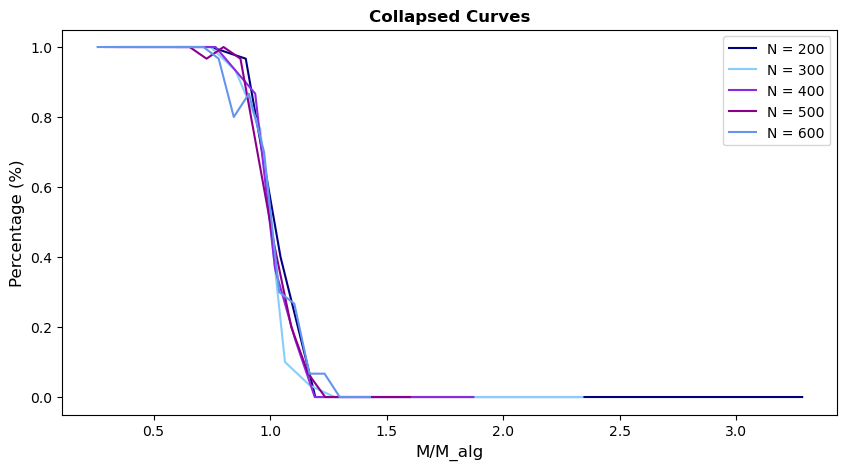

In [620]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.plot(probabilities['200'].index / M_alg[200], probabilities['200'].values, color = 'navy', label = 'N = 200')
ax.plot(probabilities['300'].index / M_alg[300], probabilities['300'].values, color = 'lightskyblue', label = 'N = 300')
ax.plot(probabilities['400'].index / M_alg[400], probabilities['400'].values, color = 'blueviolet', label = 'N = 400')
ax.plot(probabilities['500'].index / M_alg[500], probabilities['500'].values, color = 'darkmagenta', label = 'N = 500')
ax.plot(probabilities['600'].index / M_alg[600], probabilities['600'].values, color = 'cornflowerblue', label = r'N = 600')

ax.legend(loc = 'best')
ax.set_title('Collapsed Curves', fontsize=12, fontweight="bold")
ax.set_xlabel('M/M_alg', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)